<a href="https://colab.research.google.com/github/springboardmentor54158a/AIDriven-Archaeological-Site-Mapping/blob/Shreyansh/Archaeological_Site_Mapping_using_vegetation_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics albumentations


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.8 MB/s eta 0:00:00


In [ ]:
import ultralytics
import albumentations as A

print("Ultralytics version:", ultralytics.__version__)
print("Albumentations version:", A.__version__)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics version: 8.3.201
Albumentations version: 2.0.8


In [ ]:
!cp -r "/content/drive/MyDrive/vegetation segmentation.v2i.yolov8" /content/dataset


^C


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp -r "/content/drive/MyDrive/vegetation segmentation.v2i.yolov8" /content/dataset


In [ ]:
# data.yaml file ccontent
yaml_content = """
train: /content/drive/MyDrive/vegetation segmentation.v2i.yolov8/train/images
val: /content/drive/MyDrive/vegetation segmentation.v2i.yolov8/valid/images
test: /content/drive/MyDrive/vegetation segmentation.v2i.yolov8/test/images

nc: 2
names:
  - vegetation
  - ruin
"""



In [ ]:
#create data.yaml and write the content to it
file_path = "/content/drive/MyDrive/vegetation segmentation.v2i.yolov8/data.yaml"

with open(file_path, "w") as file:
    file.write(yaml_content)

print(f"data.yaml saved at: {file_path}")



data.yaml saved at: /content/drive/MyDrive/vegetation segmentation.v2i.yolov8/data.yaml


In [ ]:
import yaml
import os

file_path = "/content/drive/MyDrive/vegetation segmentation.v2i.yolov8/data.yaml"

with open(file_path, "r") as f:
    data = yaml.safe_load(f)

for key in ['train', 'val', 'test']:
    path = data[key]
    if os.path.exists(path):
        print(f"{key} path exists ✅: {path}")
    else:
        print(f"{key} path NOT found ❌: {path}")


train path exists ✅: /content/drive/MyDrive/vegetation segmentation.v2i.yolov8/train/images
val path exists ✅: /content/drive/MyDrive/vegetation segmentation.v2i.yolov8/valid/images
test path exists ✅: /content/drive/MyDrive/vegetation segmentation.v2i.yolov8/test/images


Sample image: /content/drive/MyDrive/vegetation segmentation.v2i.yolov8/train/images/0-11-24_png.rf.94f250959a261d01029a2dd9d5c665c1.jpg


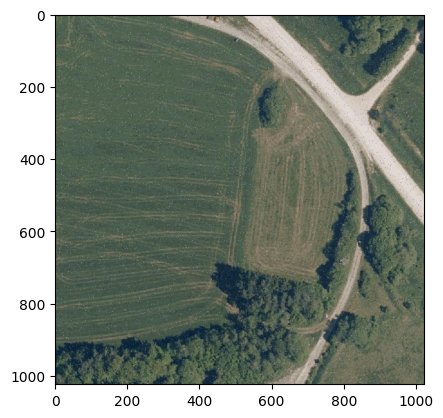

In [ ]:
# check fro folders are loaded or not
import matplotlib.pyplot as plt
import cv2
import glob

train_images = glob.glob(data['train'] + "/*.jpg")  # or .png
print("Sample image:", train_images[0])

img = cv2.imread(train_images[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()


In [ ]:
# Install Ultralytics if not installed
!pip install ultralytics --upgrade

from ultralytics import YOLO

# Load the pretrained YOLOv8 small model
model = YOLO("yolov8s.pt")  # pretrained on COCO

# Train / Fine-tune on your vegetation dataset
model.train(
    data="/content/drive/MyDrive/vegetation segmentation.v2i.yolov8/data.yaml",  # path to your data.yaml
    epochs=50,            # increase epochs to 50
    imgsz=640,            # image size
    batch=16,             # batch size
    pretrained=True,      # use pretrained COCO weights
    name="vegetation_yolo_finetune",  # output folder name
    patience=10           # early stopping if no improvement
)



Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/vegetation segmentation.v2i.yolov8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=vegetation_yolo_finetune2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_m

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e984852e9c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
from ultralytics import YOLO

# Load your trained model
model = YOLO("/content/runs/detect/vegetation_yolo_finetune2/weights/best.pt")

# Evaluate on your dataset (validation or test)
metrics = model.val(data="/content/drive/MyDrive/vegetation segmentation.v2i.yolov8/data.yaml")

# Access the results dictionary
results = metrics.results_dict

# Helper function to safely get a metric or None
def get_metric(key):
    return results[key] if key in results else None

# Get precision, recall, mAP50, mAP50-95
precision = get_metric('metrics/precision(B)')
recall = get_metric('metrics/recall(B)')
map50 = get_metric('metrics/mAP_0.5(B)')
map50_95 = get_metric('metrics/mAP_0.5:0.95(B)')

# Calculate F1-score if not directly available
f1_score = get_metric('metrics/f1(B)')
if f1_score is None and precision is not None and recall is not None:
    f1_score = 2 * (precision * recall) / (precision + recall)

# Print metrics safely
print("✅ Evaluation Metrics:")
if precision is not None: print(f"Precision: {precision:.3f}")
if recall is not None: print(f"Recall: {recall:.3f}")
if f1_score is not None: print(f"F1-score: {f1_score:.3f}")
if map50 is not None: print(f"mAP50: {map50:.3f}")
if map50_95 is not None: print(f"mAP50-95: {map50_95:.3f}")

# Optional: print all available keys to see what else you can use
print("\nAll available metrics keys:", results.keys())


Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.2 ms, read: 72.7±45.5 MB/s, size: 159.3 KB)
val: Scanning /content/drive/MyDrive/vegetation segmentation.v2i.yolov8/valid/labels.cache... 59 images, 9 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 59/59 117.7Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 1.3it/s 3.0s


Traceback (most recent call last):
  File "/usr/lib/python3.12/multiprocessing/queues.py", line 270, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.12/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.12/multiprocessing/connection.py", line 427, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.12/multiprocessing/connection.py", line 384, in _send
    n = write(self._handle, buf)
        ^^^^^^^^^^^^^^^^^^^^^^^^
OSError: [Errno 9] Bad file descriptor
Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/usr/lib/python3.12/multiprocessing/queues.py", line 259, in _feed
    reader_close()
  File "/usr/lib/python3.12/multiprocessing/connection.py", line 178, in close
    self._close()
  File "/usr/lib/python3.12/multiprocessing/connection.py", line 377, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor

During handling of the above exc

                   all         59        132      0.801      0.508      0.659      0.438
            vegetation         50        132      0.801      0.508      0.659      0.438
Speed: 7.5ms preprocess, 11.1ms inference, 0.0ms loss, 5.8ms postprocess per image
Results saved to /content/runs/detect/val6
✅ Evaluation Metrics:
Precision: 0.801
Recall: 0.508
F1-score: 0.621

All available metrics keys: dict_keys(['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'fitness'])


In [ ]:
# Copy the best trained model to your Google Drive with a custom name
!cp /content/runs/detect/vegetation_yolo_finetune2/weights/best.pt \
/content/drive/MyDrive/vegetation_model2_yolov8s_finetune_best.pt

# Back up the entire training folder with a custom name
!cp -r /content/runs/detect/vegetation_yolo_finetune2 \
/content/drive/MyDrive/vegetation_model2_yolov8s_finetune_backup
